<a href="https://colab.research.google.com/github/Muzammel571/Superstore-E-Commerce-Performance-Analysis/blob/main/Superstore_E_Commerce_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading Libraries for Data Cleaning, Mathematics Calculations, Data Visulalization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loading Dataset with Special Columns
data = pd.read_csv("Super Store orders Data.csv", encoding = 'latin-1') # encoding='latin-1': To Read Special characters in file

In [5]:
#Checking Data
data

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3


In [ ]:
# Checking Data Header Name in Dataset
data.head ()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Let’s start by looking at the descriptive statistics of the dataset


In [6]:
data.describe ()

,Order Id,Postal Code,cost price,List Price,Quantity,Discount Percent
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,201.189714,229.756854,3.789574,3.484090
std,2885.163629,32063.693350,537.743203,623.245839,2.225110,1.114211
min,1.000000,1040.000000,0.000000,0.000000,1.000000,2.000000
25%,2499.250000,23223.000000,20.000000,20.000000,2.000000,2.000000
50%,4997.500000,56430.500000,50.000000,50.000000,3.000000,3.000000
75%,7495.750000,90008.000000,180.000000,210.000000,5.000000,4.000000
max,9994.000000,99301.000000,18110.000000,22640.000000,14.000000,5.000000


The dataset has an order date column. We can use this column to create new columns like order month, order year, and order day, which will be very valuable for sales and profit analysis according to time periods. So let’s add these columns:



In [ ]:
# Checking Data Type
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Converting  Date Columns

In [ ]:
data ['Order Date'] = pd.to_datetime (data['Order Date'])
data ['Ship Date'] = pd.to_datetime (data['Ship Date'])

# Adding New Date-Based Columns


In [ ]:
# Adding 3 Column for Data Analysis
data ['Order Month'] = data ['Order Date'].dt.month
data ['Order Year'] = data ['Order Date'].dt.year
data ['Order Day of Week'] = data ['Order Date'].dt.dayofweek

In [ ]:
data.head (3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,6,2016,6


# Monthly Sales Analysis

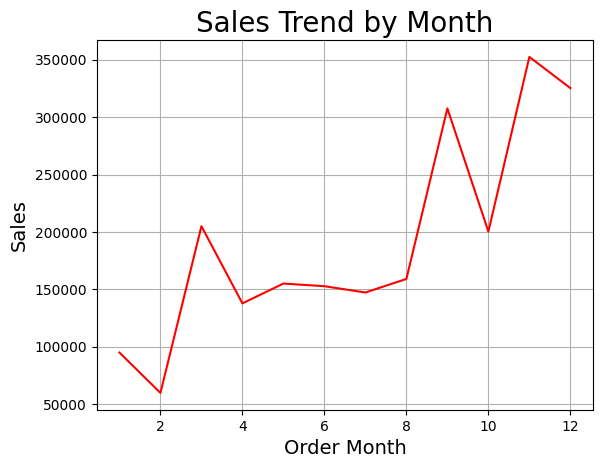

In [ ]:
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()
plt.plot(sales_by_month['Order Month'],
         sales_by_month['Sales'],
         color='Red')

# Add labels and title
plt.title('Sales Trend by Month', fontsize=20)
plt.xlabel('Order Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Show grid
plt.grid(True)

# Display the chart
plt.show()


# Sales Analysis by Category


In [ ]:
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index ()

In [ ]:
sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


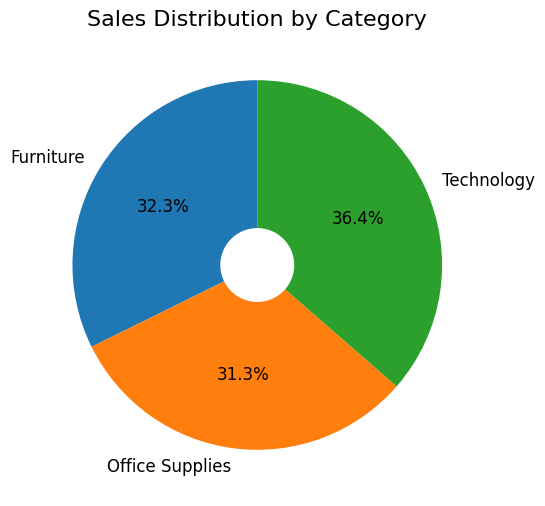

In [ ]:
# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    sales_by_category['Sales'],  # Values for the pie chart
    labels=sales_by_category['Category'],  # Labels for the slices
    autopct=lambda p: f'{p:.1f}%',  # Format percentage
    startangle=90,  # Rotate the chart
    textprops={'fontsize': 12, 'color': 'black'},  # Text styling
    wedgeprops=dict(width=0.8)  # Donut style
)

# Add title
plt.title('Sales Distribution by Category', fontsize=16)

# Show the chart
plt.show()



# Sales Analysis by Sub-Category


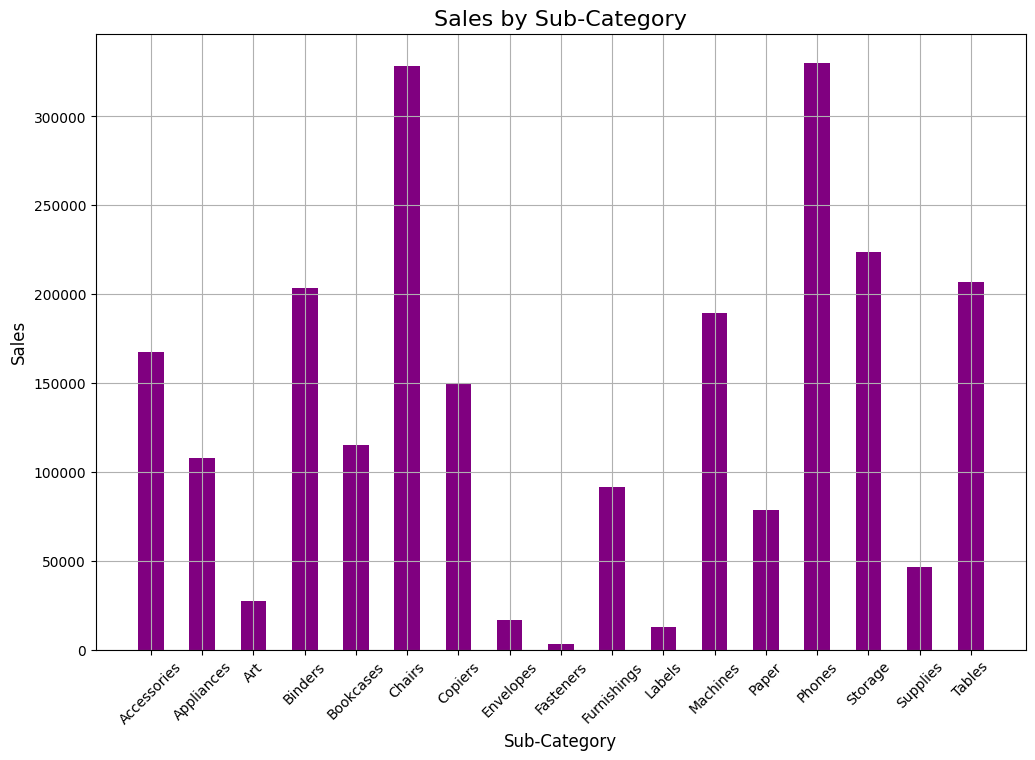

In [ ]:
# Group data by Sub-Category and calculate total Sales
sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index()

# Extract x and y values for the bar chart
x = sales_by_subcategory['Sub-Category']  # Sub-Category names
y = sales_by_subcategory['Sales']  # Sales values

# Create the bar chart
plt.figure(figsize=(12, 8))  # Set figure size
plt.bar(x, y, width=0.5, color="Purple")  # Plot the bar chart

# Add chart title and axis labels
plt.title("Sales by Sub-Category", fontsize=16)  # Chart title
plt.xlabel("Sub-Category", fontsize=12)  # X-axis label
plt.ylabel("Sales", fontsize=12)  # Y-axis label

# Customize x-axis ticks
plt.xticks(rotation=45, fontsize=10)  # Rotate and format x-axis labels for better readability

# Show the chart
plt.show()


# Monthly Profit Analysis


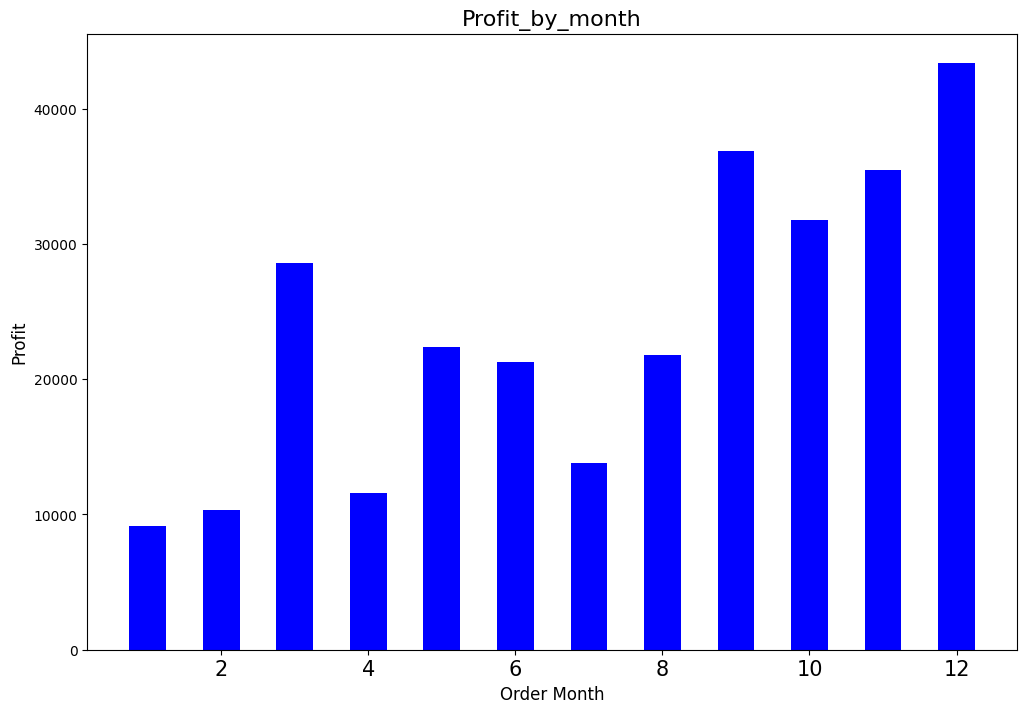

In [ ]:
profit_by_month = data.groupby ('Order Month')['Profit'].sum().reset_index ()

# Extract x and y values for the bar chart
x = profit_by_month['Order Month']  # Sub-Category names
y = profit_by_month['Profit']  # Sales values

# Create the bar chart
plt.figure(figsize=(12, 8))  # Set figure size
plt.bar(x, y, width=0.5, color="Blue")  # Plot the bar chart

# Add chart title and axis labels
plt.title("Profit_by_month", fontsize=16)  # Chart title
plt.xlabel("Order Month", fontsize=12)  # X-axis label
plt.ylabel("Profit", fontsize=12)  # Y-axis label

# Customize x-axis ticks
plt.xticks(fontsize=15)  # Rotate and format x-axis labels for better readability

# Show the chart
plt.show()

# Profit Analysis by Category


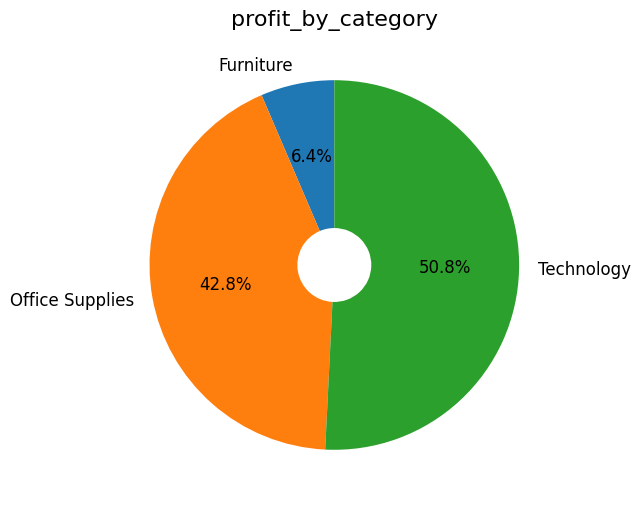

In [ ]:
profit_by_category = data.groupby('Category')['Profit'].sum ().reset_index ()

plt.figure(figsize=(8, 6))
plt.pie(
    profit_by_category['Profit'],  # Values for the pie chart
    labels = profit_by_category['Category'],  # Labels for the slices
    autopct=lambda p: f'{p:.1f}%',  # Format percentage
    startangle=90,  # Rotate the chart
    textprops={'fontsize': 12, 'color': 'black'},  # Text styling
    wedgeprops=dict(width=0.8)  # Donut style
)

# Add title
plt.title('profit_by_category', fontsize=16)

# Show the chart
plt.show()


# Profit Analysis by Sub-Category


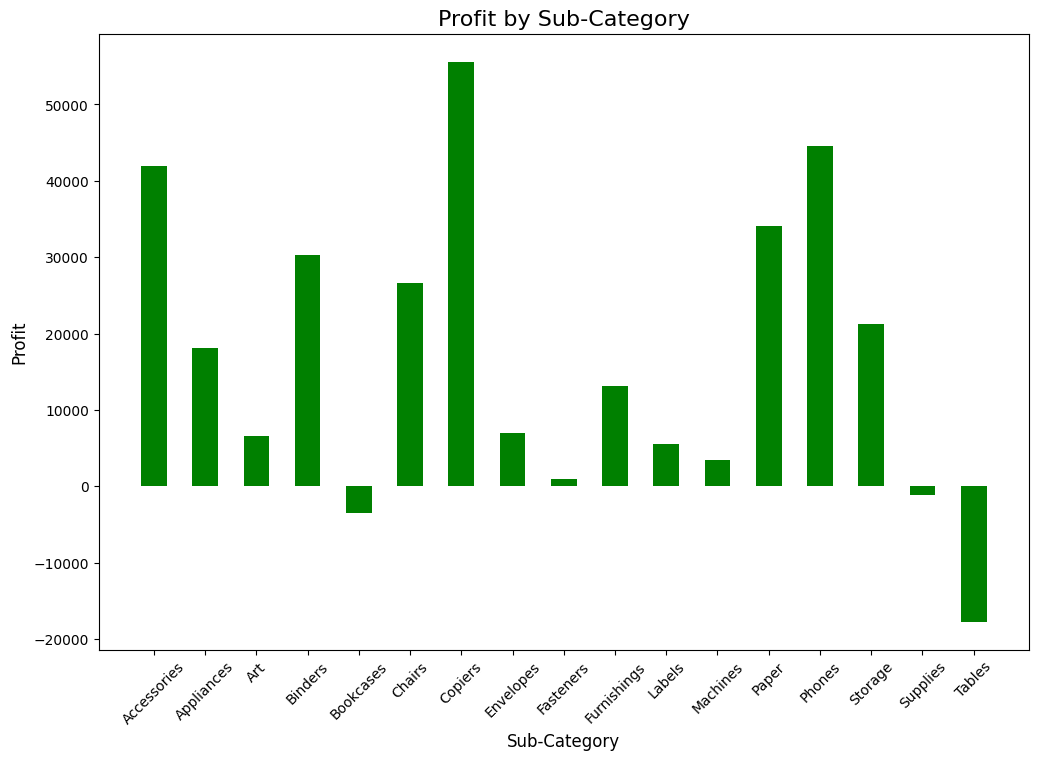

In [ ]:
profit_Sub_category = data.groupby('Sub-Category')['Profit'].sum ().reset_index ()

# Extract x and y values for the bar chart
x = profit_Sub_category['Sub-Category']  # Sub-Category names
y = profit_Sub_category['Profit']  # Profit values

# Create the bar chart
plt.figure(figsize=(12, 8))  # Set figure size
plt.bar(x, y, width=0.5, color="green")  # Plot the bar chart with green bars

# Add chart title and axis labels
plt.title("Profit by Sub-Category", fontsize=16)  # Chart title
plt.xlabel("Sub-Category", fontsize=12)  # X-axis label
plt.ylabel("Profit", fontsize=12)  # Y-axis label

# Customize x-axis ticks
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability

# Show the chart
plt.show()


# Analyse sales-to-profit ratio



In [ ]:
# Grouping by 'Segment' and summing 'Sales' and 'Profit'
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Calculate the Sale to Profit Ratio
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']

# Print the required columns
print(sales_profit_by_segment[["Segment", "Sales_to_Profit_Ratio"]])


       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416
